## Declaração de biblioteca e outras configurações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec

import csv

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Funções usadas no método

In [2]:
#Função de leitura dos dados------------------------------------
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    y = data[:,0]
    x = data[:,1:]
    return y,x

In [3]:
#Implementação o método baseado em grafo------------------------
def graph_ssl(data,label): #yD,sig,alpha

    t = data.shape[0]        #quantidade de padrões envolvidos no problema
    c = len( np.unique(yD) ) #quantidaed de classes...

    #Definir a matriz de rótulos
    Y = np.zeros((t,c))
    for i in range(t):
        if labels[i] != -1:
            Y[i,int(labels[i])] = 1

    #Definir a matriz de afinidade
    H = np.zeros((t,t))
    for i in range(t-1):
        for j in range(i+1,t):
            H[i,j] = np.exp(-(np.linalg.norm(data[i,:]-data[j,:])**2)/(2*(sig**2)))
            H[j,i] = H[i,j]

    #Definir a matriz 'grau'
    Q = np.zeros((t,t))
    for i in range(t):
        Q[i,i] = 1/np.sum(H[i,:])

    #Calcular a matriz de afinidade normalizada
    S = (Q.dot(H)).dot(Q)

    #Calcular a matriz de pertinência
    U = np.linalg.inv( np.identity(t) - alpha*S)
    U = U.dot(Y)

    return U

## Leitura dos dados (início do experimento)

In [4]:
#Arquivos com informações de treinamento e avaliação
path_data_Rotulado = 'simTreino.txt'
path_data_naoRotulado = 'simNaoRotulado.txt'

yD,xD = read_class_data(path_data_Rotulado)    #Dados de treinamento
yI,xI = read_class_data(path_data_naoRotulado) #Dados não rotulados (avaliação)

## Configurações usadas no processo
* sig -- $\sigma$ -- controla a expressão das medidas de afinidade
* alpha -- $\alpha$ -- controla a expressão de pertinência padrões-classe

In [9]:
sig = 2.0
alpha = 1.5

## Execução do método

In [10]:
data = np.append(xD,xI, axis=0)
labels = np.append(yD, np.zeros(yI.shape[0])-1 ,axis=0) #Junção dos dados em um único conjunto

U = graph_ssl(data,labels)

#Realiza o rotulamento das observações em 'data'
t,c = U.shape
pred = np.zeros((t))
for i in range(t):
    pred[i] = np.argmax( U[i,:] )

## Avaliação dos resultados
* Diferente do (nosso) convencional...

In [11]:
posAvalia = np.where(labels == -1)[0]
acuracia = np.count_nonzero( pred[posAvalia] == yI )/yI.shape[0]
print(acuracia)

0.8285714285714286


## Visualização dos resultados

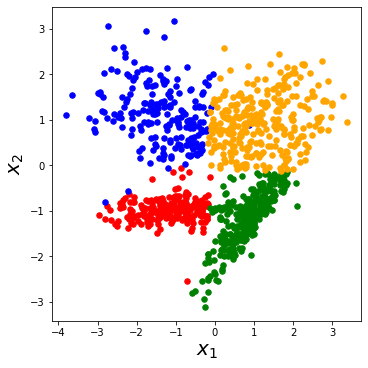

In [12]:
cores = ['red','blue','green','orange'] #Deve ser compatível com o número de classes

FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#Subgráfico...
ax = fig.add_subplot(spec[0,0])
for i in range(c):
    pos = np.where( np.array(pred) == i)
    ax.scatter(data[pos, 0], data[pos, 1], marker='o', c=cores[i], s=30)
    
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)

plt.show()